## **Decodificación de máscaras**
El siguiente código recorre un CSV dado como entrada que contiene las máscaras COCO codificadas y comprimidas y decodifica cada máscara codificada de vuelta a un array np, para cada escena.
Finalmente, se insertan en un diccionario a disposición del usuario. \
El nombre del CSV debe especificarse a continuación en la variable "nombre_del_conjunto_de_datos". \
Los CSVx dados para entrenamiento, validación y prueba pueden encontrarse en /kaggle/input/5r-competicion

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import zlib
import base64
import typing as t
import cv2
import matplotlib.pyplot as plt
!pip install pycocotools
from pycocotools import _mask as coco_mask

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 6.7 MB/s eta 0:00:00


In [2]:
name_of_the_dataset = "TRAIN_COCO_COMPRESSED" # OR 'VALIDATION_COCO_COMPRESSED' OR 'TEST_COCO_COMPRESSED'
df = pd.read_csv("/kaggle/input/5r-competicion/" + name_of_the_dataset + ".csv")

In [3]:
def decode_binary_mask(encoded_mask: t.Text, width: int, height: int) -> np.ndarray:
    """Decodes an encoded binary mask back to a numpy array."""
    # Decode base64 and decompress
    decoded_str = base64.b64decode(encoded_mask)
    decompressed_str = zlib.decompress(decoded_str)

    # Decode RLE
    rle = {
        'size': [height, width],
        'counts': str(decompressed_str, encoding='utf-8')
    }

    # Convert to list of dictionaries (consistent with coco_mask.decode input format)
    rle_list = [rle]

    # Use COCO API to decode RLE into binary mask
    mask = coco_mask.decode(rle_list)

    return mask[:, :, 0]

decoded_masks_dict = {}

# Loop through the DataFrame and decode each mask
for index, row in df.iterrows():
    # Split the encoded masks string and decode each mask
    encoded_masks = row['EncodedMasks'].split(" ")
    decoded_masks_list = []
    for encoded_mask in encoded_masks:
        decoded_mask = decode_binary_mask(encoded_mask, row['Width'], row['Height'])
        decoded_masks_list.append(decoded_mask)

    # Add the decoded masks list to the dictionary
    decoded_masks_dict[row['ID']] = {
        'Width': row['Width'],
        'Height': row['Height'],
        'Masks': decoded_masks_list
    }

print("¡Máscaras decodificadas con éxito! Se pueden encontrar en el diccionario python decoded_masks_dict.")


¡Máscaras decodificadas con éxito! Se pueden encontrar en el diccionario python decoded_masks_dict.


## **Visualización de máscaras**

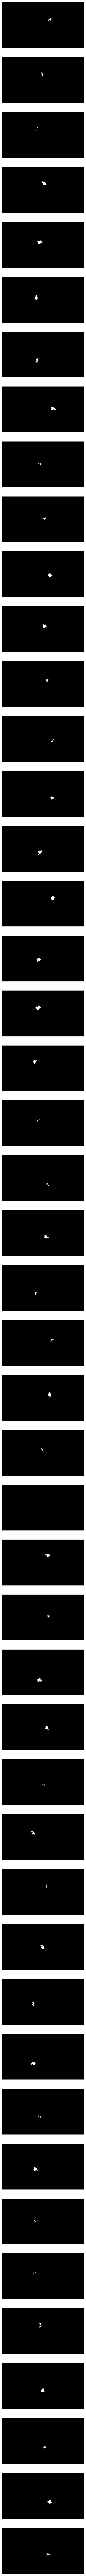

In [4]:
# Specify the scene ID for which you want to visualize the masks
target_id = next(iter(decoded_masks_dict))

# Get the source masks and decoded masks for the target ID
decoded_masks = decoded_masks_dict[target_id]["Masks"]

# Calculate the number of masks
num_masks = len(decoded_masks)

# Plot the image
fig, axes = plt.subplots(num_masks, 1, figsize=(150, 150))  # Adjust figsize as needed

for i, ax in enumerate(axes):
    ax.imshow(decoded_masks[i], cmap='gray')
    ax.axis('off')  # Turn off axis

plt.show()